# Convolutional Neural Networks Example

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import seaborn as sns

### Example: Images of fashion objects

In [88]:
# 60.000 training images, 10.000 test images, black-white 28x28
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

### Data Prep

In [89]:
# Training and test dataset sizes
train_size=X_train.shape[0]
test_size=X_test.shape[0]
(train_size, test_size)

(60000, 10000)

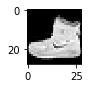

In [90]:
# Visualize first image
fig, ax = plt.subplots(figsize=(1, 1))
ax.imshow(X_train[0], interpolation='nearest', cmap='gray')

In [91]:
# Number of fashion categories
num_categories=np.unique(y_train).size
num_categories

10

In [92]:
# One-hot encoding of categories
y_train=keras.utils.to_categorical(y_train, num_classes=num_categories)
y_test=keras.utils.to_categorical(y_test, num_classes=num_categories)

In [93]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [94]:
# Reshape images to 28x28x1 (1 = channel -> grayscale)
X_train=X_train.reshape(train_size, 28, 28, 1)
X_test=X_test.reshape(test_size, 28, 28, 1)

In [95]:
# Scale pixel values to 0...1 range
X_train=X_train/255
X_test=X_test/255

### Build model

In [96]:
# Define model steps
model=keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=X_train.shape[1:]))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_categories, activation='softmax'))

In [97]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adadelta(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [98]:
# Fit the model
hist=model.fit(X_train, y_train, batch_size=125, epochs=25, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 57s 953us/step - loss: 0.6954 - accuracy: 0.7455 - val_loss: 0.4533 - val_accuracy: 0.8314
Epoch 2/25
60000/60000 [==============================] - 55s 918us/step - loss: 0.4495 - accuracy: 0.8383 - val_loss: 0.3832 - val_accuracy: 0.8601
Epoch 3/25
60000/60000 [==============================] - 57s 942us/step - loss: 0.3882 - accuracy: 0.8622 - val_loss: 0.3451 - val_accuracy: 0.8763
Epoch 4/25
60000/60000 [==============================] - 59s 988us/step - loss: 0.3529 - accuracy: 0.8737 - val_loss: 0.3284 - val_accuracy: 0.8816
Epoch 5/25
60000/60000 [==============================] - 55s 911us/step - loss: 0.3309 - accuracy: 0.8813 - val_loss: 0.3079 - val_accuracy: 0.8904
Epoch 6/25
60000/60000 [==============================] - 48s 803us/step - loss: 0.3121 - accuracy: 0.8888 - val_loss: 0.2955 - val_accuracy: 0.8932
Epoch 7/25
60000/60000 [==============================] 

In [145]:
# Store result metrics in a dataframe
df_metrics=pd.DataFrame(hist.history, index=range(1,26))
df_metrics

,val_loss,val_accuracy,loss,accuracy
1,0.453305,0.8314,0.695403,0.745550
2,0.383199,0.8601,0.449459,0.838283
3,0.345052,0.8763,0.388184,0.862150
4,0.328354,0.8816,0.352874,0.873667
5,0.307884,0.8904,0.330882,0.881350
6,0.295508,0.8932,0.312138,0.888833
7,0.284593,0.9000,0.296376,0.893500
8,0.276955,0.9004,0.284286,0.897283
9,0.279322,0.9006,0.271938,0.901367
10,0.275345,0.9027,0.263514,0.905133


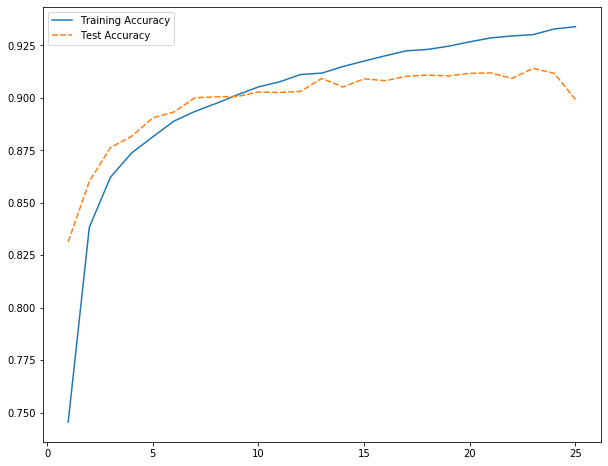

In [146]:
df_plot=df_metrics.rename(
        columns={'accuracy': 'Training Accuracy', 'val_accuracy': 'Test Accuracy'}
    )[['Training Accuracy', 'Test Accuracy']]
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=df_plot, ax=ax)